# Baseball Case Study
## Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("E:/Datatrained/Practice Project/Baseball Case Study/baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.sample(6)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95


In [6]:
df.shape

(30, 17)

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


in the summary statistics it has All numerical features and some of the features are not normaly distributed

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<AxesSubplot:>

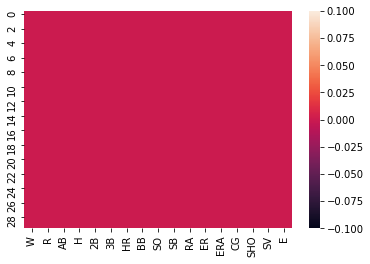

In [127]:
# checking Null Values
sns.heatmap(df.isnull())

Observed No null value present in any of the features

Lets Convert all the features into Floats

In [12]:
df["W"] = df["W"].astype(float)
df["R"] = df["R"].astype(float)
df["AB"] = df["AB"].astype(float)
df["H"] = df["H"].astype(float)
df["2B"] = df["2B"].astype(float)
df["3B"] = df["3B"].astype(float)
df["HR"] = df["HR"].astype(float)
df["BB"] = df["BB"].astype(float)
df["SO"] = df["SO"].astype(float)
df["SB"] = df["SB"].astype(float)
df["RA"] = df["RA"].astype(float)
df["ER"] = df["ER"].astype(float)
df["CG"] = df["CG"].astype(float)
df["SHO"] = df["SHO"].astype(float)
df["SV"] = df["SV"].astype(float)
df["E"] = df["E"].astype(float)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     float64
 1   R       30 non-null     float64
 2   AB      30 non-null     float64
 3   H       30 non-null     float64
 4   2B      30 non-null     float64
 5   3B      30 non-null     float64
 6   HR      30 non-null     float64
 7   BB      30 non-null     float64
 8   SO      30 non-null     float64
 9   SB      30 non-null     float64
 10  RA      30 non-null     float64
 11  ER      30 non-null     float64
 12  ERA     30 non-null     float64
 13  CG      30 non-null     float64
 14  SHO     30 non-null     float64
 15  SV      30 non-null     float64
 16  E       30 non-null     float64
dtypes: float64(17)
memory usage: 4.1 KB


In [17]:
#devide the data into feature and labels
x = df.drop(columns = ["W"])
y = df["W"]


# Data Visualization to see the correlation

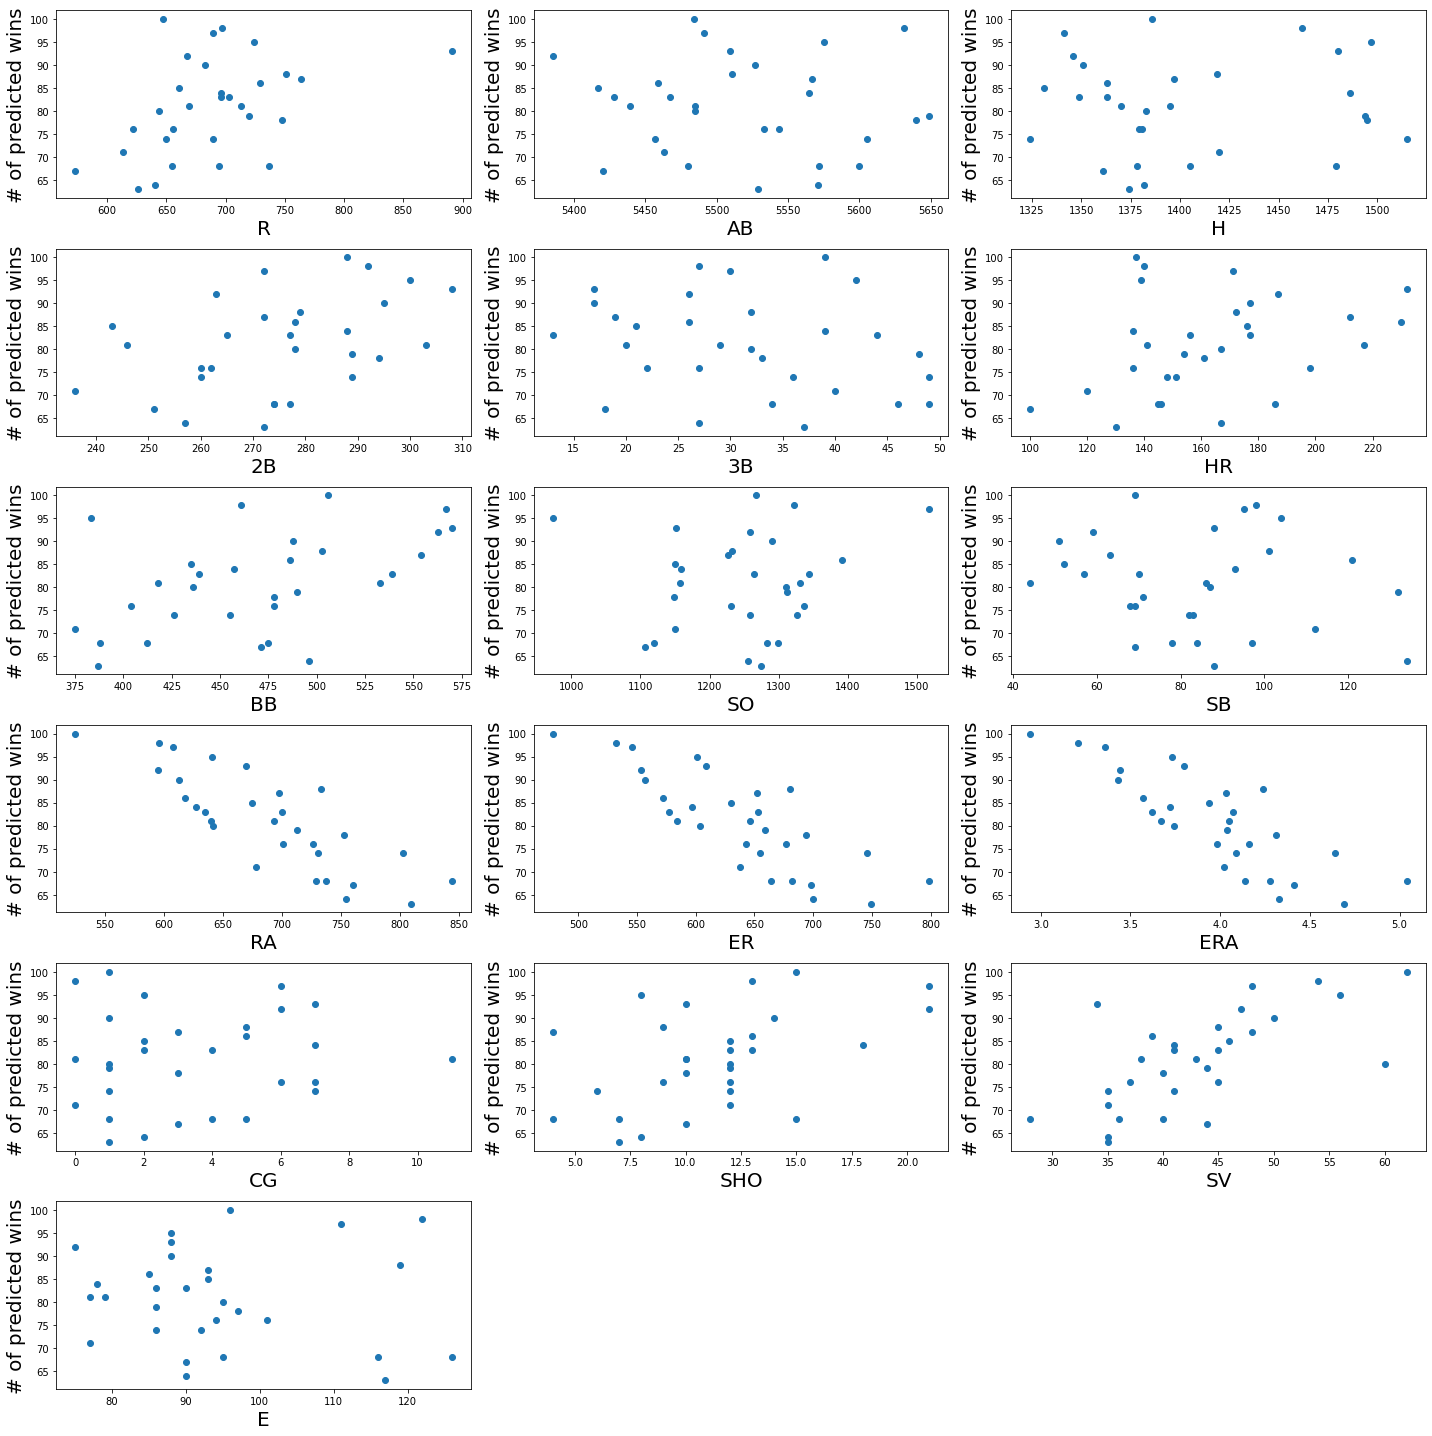

In [20]:
#lets visualize the graph to see the correlations
plt.figure(figsize = (20,20), facecolor='white')
plotnumber = 1
for column in x:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('# of predicted wins', fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

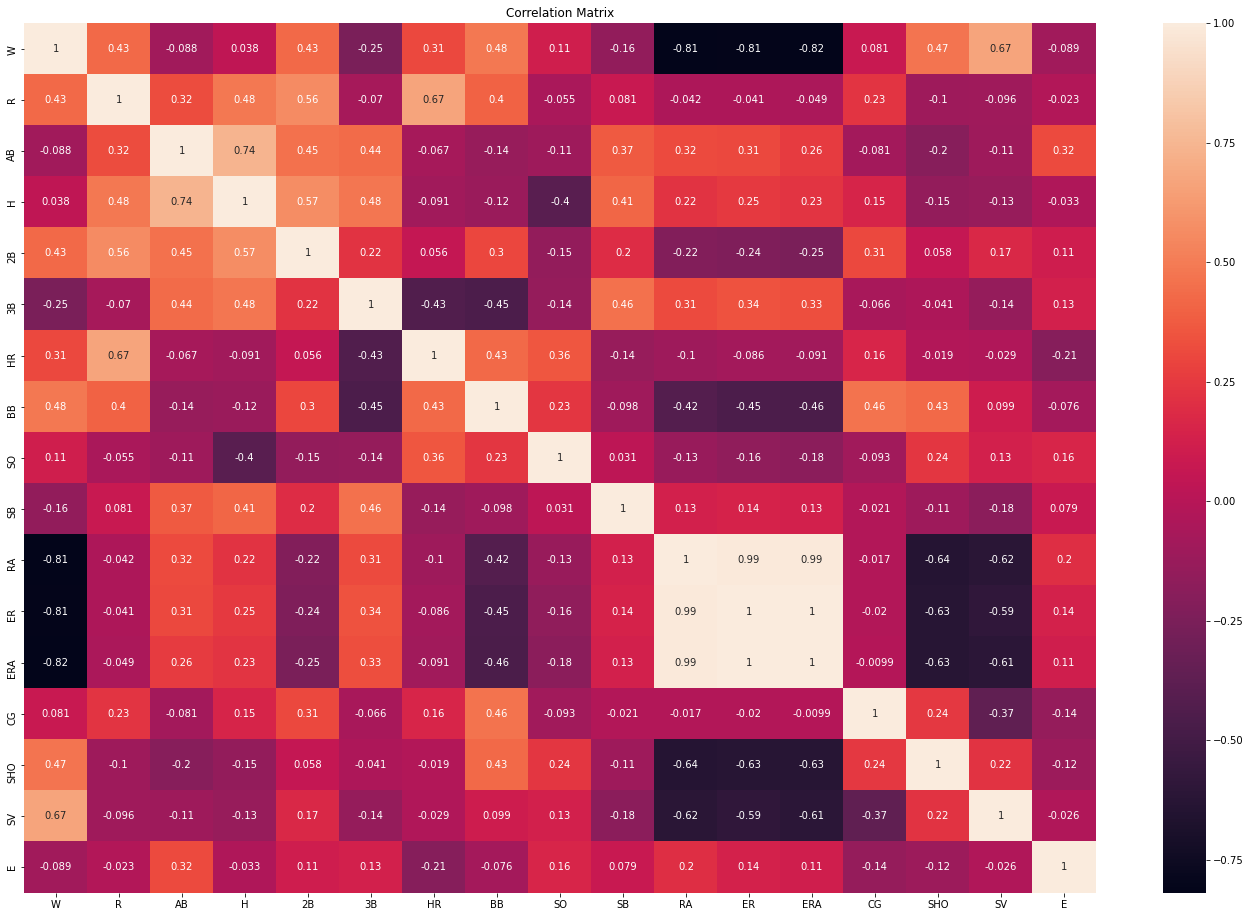

In [21]:
# Heatmap to see correlations
corr_mat = df.corr()
plt.figure(figsize=[24,16])
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix")
plt.show()

it this chart it is showing,it is lightly correlated with each other but RA, ER, ERA columns are highly correlated with each other. and also These columns are are highly negatively correlated with W(wins) columns that means there is high imapact of these columns on wining. We are dropping two columns [RA, ER] and keeping ERA(earned runs average column from them because these have same kind of effect on wins, wonts affect the prediction model

<AxesSubplot:>

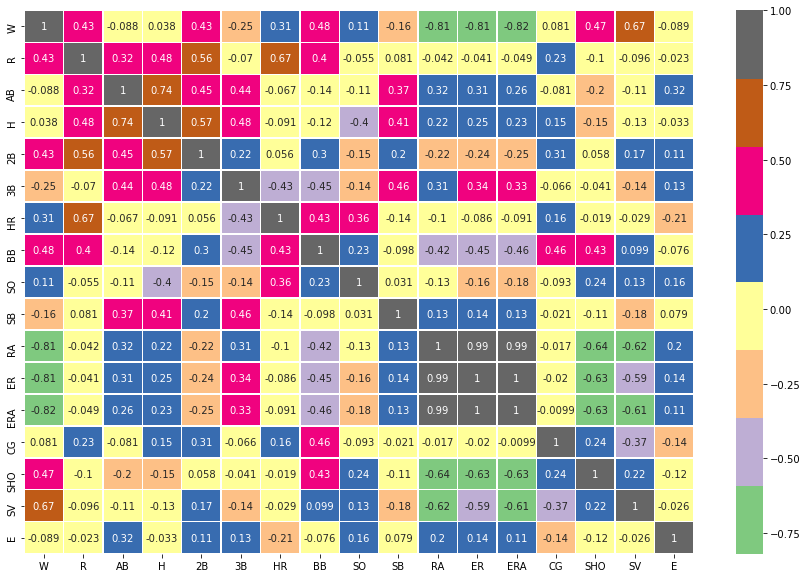

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, cmap="Accent", annot=True, linewidth=0.3)

R,2B,BB,RA,ER,ERA,SHO,SV they are highly correlated with W

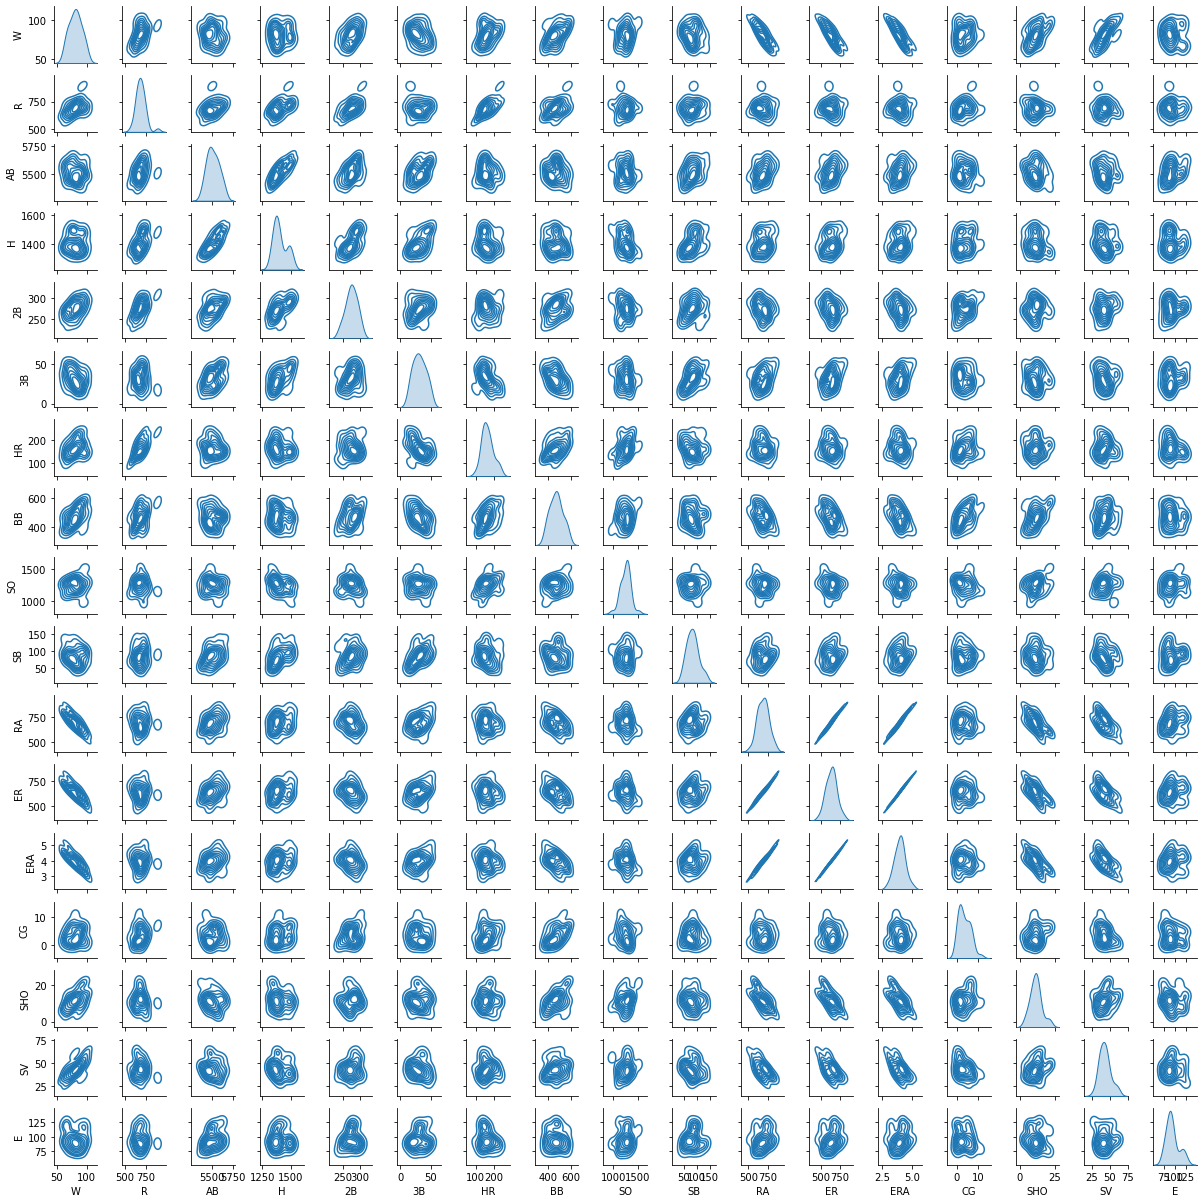

In [47]:
sns.pairplot(df,size=1,kind='kde')

in the above chart we cann see the pair of all the data

# Checking Outliers

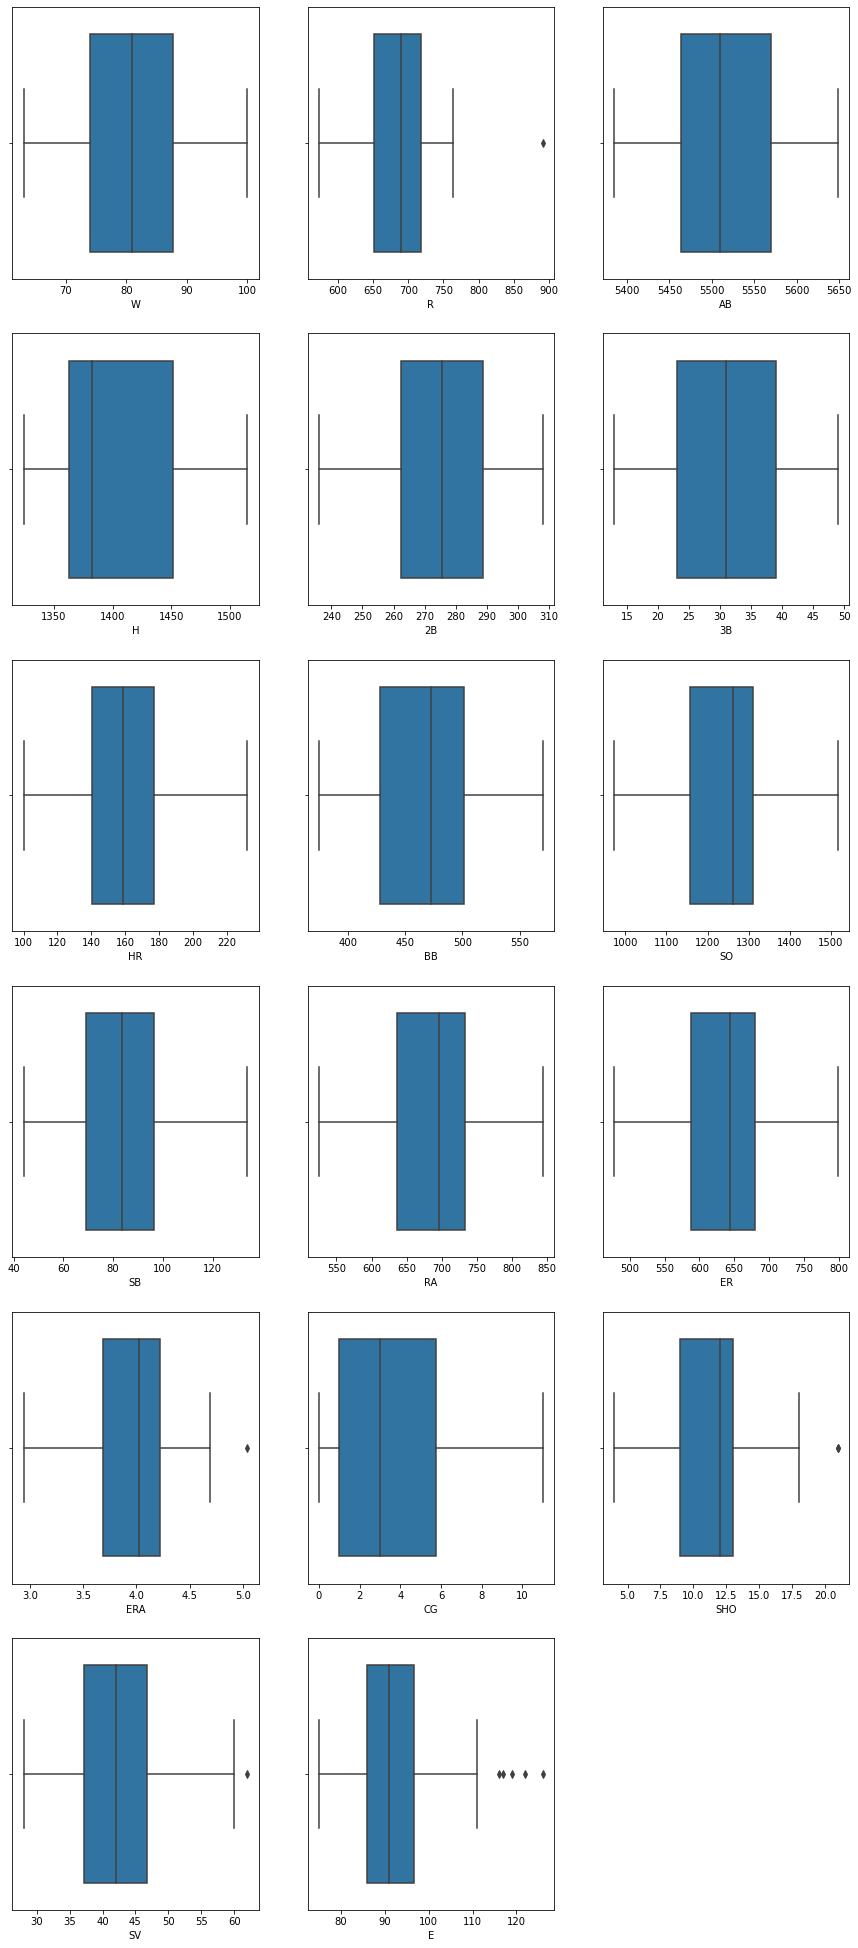

In [24]:
#Visualize the outliers in the dataset by using boxplot

plt.figure(figsize=(15,35), facecolor='white')
graph = 1

for column in df:
    if graph<=17: 
        ax = plt.subplot(6,3, graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel(column, fontsize=10)
    graph +=1
plt.show()

We can see here only 5 columns are there we have outliers in data (R, ERA, SHO, SV, E)

# Removing Outliers Using ZScore Method

In [52]:
zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [53]:
z[5][1]

3.5096470447193067

In [54]:
df_new=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_new.shape)

with outliers:: (30, 17)
After removing outliers:: (29, 17)


In [57]:
#checking for how much data we lost
loss_percent=(30-29)/30*100
print(loss_percent)

3.3333333333333335


We can see here only 1 row have been removed by ZSCORE

# Using IQR Method

In [58]:
#IQR
from scipy import stats 
IQR = stats.iqr(df) 
IQR

646.5

In [59]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [60]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(30, 17)


with IQR method there is no outliers which logical possible because of very less amount of data

# We are taking ZSCORE method we are not dealing outliers anymore because there is very less data.

# Handle Skewness in datasets and checking data distribution

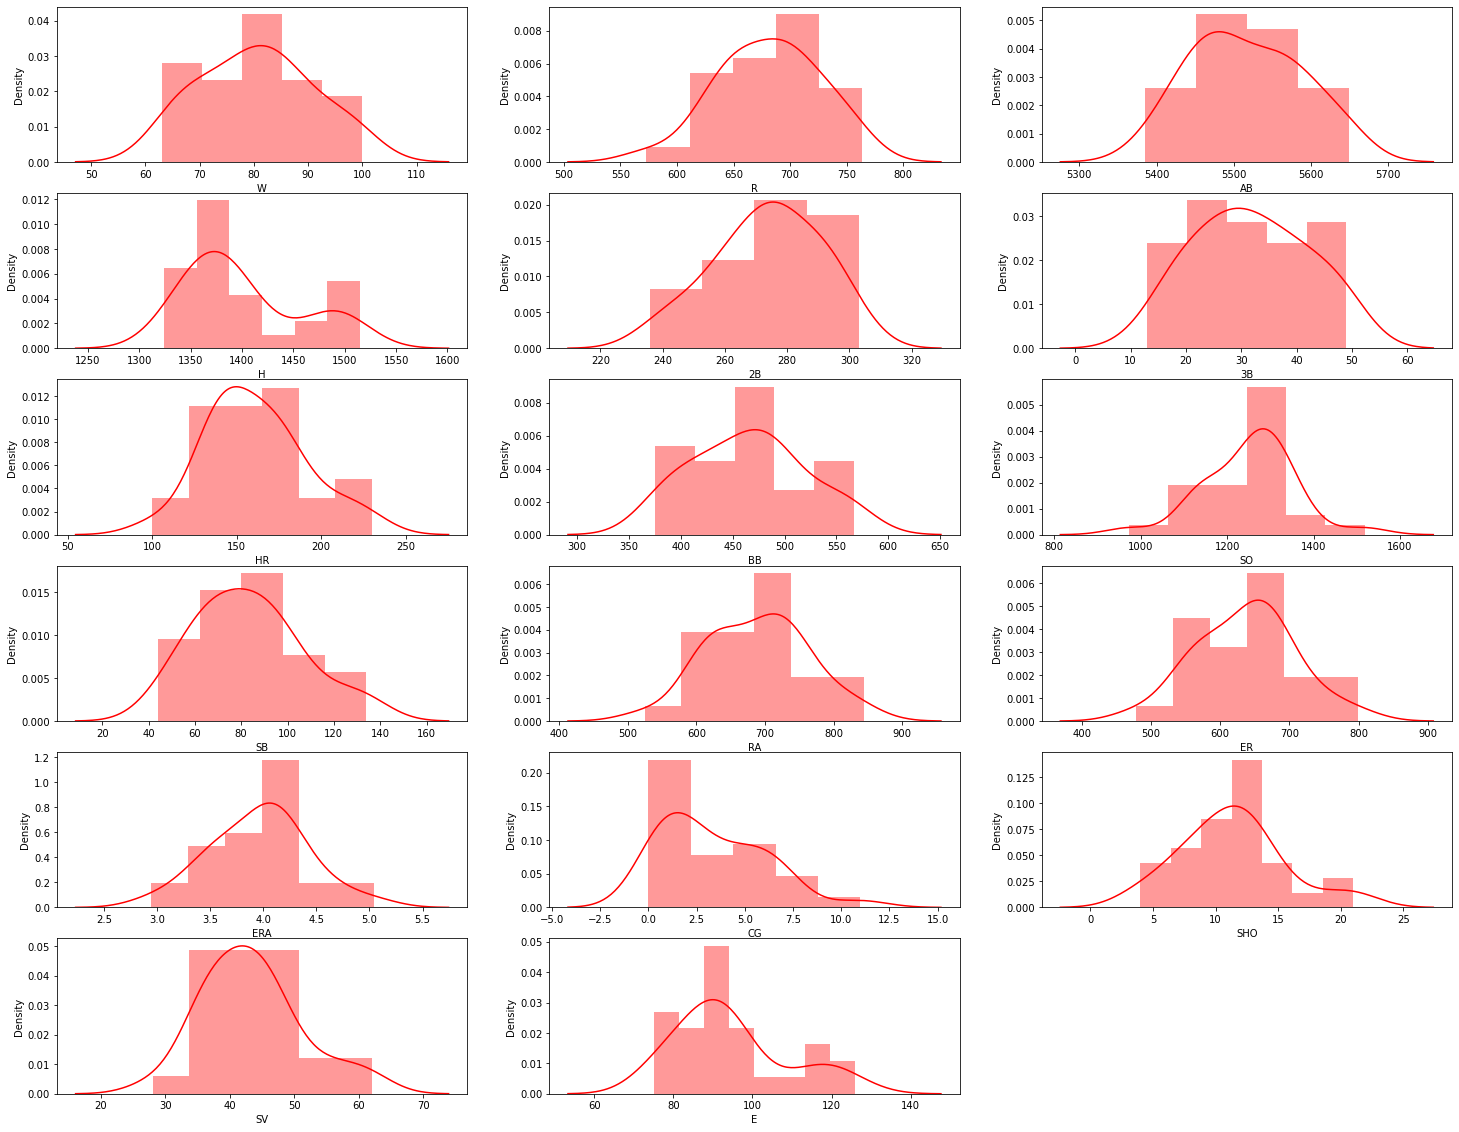

In [70]:
from sklearn.preprocessing import power_transform
plt.figure(figsize=(25,20))
for i in enumerate(df_new.columns):
    plt.subplot(6,3,i[0]+1)
    sns.distplot(df_new[i[1]],color='r')

In [71]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

We can see here there are some data skewed in column(H, CG, SHO, SV, E)

Skewness more than+/- 0.5 will we treated Here we are removing skewness from Columns(H, CG, SHO, SV, E)

In [73]:
from sklearn.preprocessing import power_transform
df_new[['H', 'CG', 'SHO', 'SV', 'E']]=power_transform(df_new[['H', 'CG', 'SHO', 'SV', 'E']],method='yeo-johnson')

In [74]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Here, we can see that skewness is almost removed from every column

# Dividing data into X and Y

In [75]:
x=df_new.drop(['W'],axis=1)
y=df_new['W']

In [76]:
x.shape

(29, 16)

In [77]:
y.shape

(29,)

# Scaling X Values

In [78]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [82]:
x1 = pd.DataFrame(x)
x1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.566709,0.498171,0.0,0.560988,0.522031,0.471353,0.471983,0.511104,0.437165,0.513674,0.494575,0.486535,0.462820,0.496773,0.545151,0.508101
std,0.237471,0.271595,0.0,0.257760,0.285448,0.227698,0.285046,0.190697,0.257811,0.229782,0.221794,0.219594,0.271806,0.244940,0.222023,0.276493
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403141,0.295455,0.0,0.388060,0.361111,0.307692,0.265625,0.341284,0.277778,0.344828,0.330218,0.347619,0.230279,0.373171,0.400262,0.361169
50%,0.607330,0.477273,0.0,0.567164,0.527778,0.430769,0.500000,0.533945,0.433333,0.542320,0.523364,0.519048,0.495369,0.553751,0.556566,0.508619
75%,0.732984,0.704545,0.0,0.776119,0.722222,0.592308,0.630208,0.622018,0.588889,0.652038,0.629283,0.619048,0.668644,0.609418,0.666996,0.612261
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
x1.shape

(29, 16)

# Splitting the data for training and testing

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [87]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.9741611359966328
At random state 0, The test accuracy is: 0.4849254151272331


At random state 1, The training accuracy is: 0.9618654620886258
At random state 1, The test accuracy is: 0.7821707142190294


At random state 2, The training accuracy is: 0.9589828639148437
At random state 2, The test accuracy is: -0.2267545397045343


At random state 3, The training accuracy is: 0.9489751058712806
At random state 3, The test accuracy is: 0.8996059865238769


At random state 4, The training accuracy is: 0.9637357269015215
At random state 4, The test accuracy is: 0.7352234189948226


At random state 5, The training accuracy is: 0.9605673395500037
At random state 5, The test accuracy is: 0.6745005980465006


At random state 6, The training accuracy is: 0.961088322274007
At random state 6, The test accuracy is: 0.7407325901733623


At random state 7, The training accuracy is: 0.95587881194296
At random state 7, The test accuracy is: 0.6204583348557

random state=99 giving highest accuracy, choosing that as random state

SPLITTING THE DATA WITH RANDOM STATE =99

In [88]:
#splitting the data into 78% training and 22% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [89]:
x_train.shape

(22, 16)

In [90]:
y_train.shape

(22,)

In [91]:
x_test.shape

(7, 16)

In [92]:
y_test.shape

(7,)

# MODEL BUILDING:

Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9489217536392597


In [95]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 9.644080556073613
MAE: 2.7167007402593364
r2_score: 0.9339347020980998


# Ridge

In [96]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.8252182703385849


In [97]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 28.329849721785525
MAE: 4.6319359816768815
r2_score: 0.3993173413063348


# SVR
# SVR(kernel='linear')

In [98]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.42482116539687065


In [99]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 72.57498678463641
MAE: 7.21508983024974
r2_score: -5.178363161449478


# SVR(kernel='poly')

In [100]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.9728371752208628


In [101]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 25.857174222630025
MAE: 4.672728383869333
r2_score: 0.8303009293733707


# SVR(kernel='rbf')

In [102]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.21742231206767237


In [103]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 112.61848702904885
MAE: 9.245272035751194
r2_score: -69.830591835465


# RandomForestRegressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9508677780706378


In [105]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 55.523771428571465
MAE: 6.594285714285716
r2_score: -0.29682654473883185


# DecisionTreeRegressor

In [106]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [107]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 42.285714285714285
MAE: 5.428571428571429
r2_score: 0.38516320474777443


# GradientBoostingRegressor

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9999999858489446


In [109]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 57.24814419833712
MAE: 6.630025194865324
r2_score: -0.22715057323776255


# Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 29.647784, 22.094878
R    : 28.278944, 22.749162
svr    : 60.332161, 47.503197
svr_p    : 44.033210, 24.017779
svr_r    : 91.602688, 66.139162
RF    : 42.509872, 27.111376
DTR    : 78.716667, 52.661606
GBR    : 47.042513, 31.777859


Accourding to all metrics score selecting the LinearRegression as final model

# HYPER PARAMETER TUNING:

GridSearchCV
With LinearRegression

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
LR=LinearRegression()
param={
    'fit_intercept':[True,False],
    'copy_X':[True],
    'n_jobs':[-1],
   'positive' : [True],

}

In [113]:
LR_grid=GridSearchCV(LinearRegression(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [114]:
LR_grid.fit(x_train,y_train)
LR_grid_Pred=LR_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


In [115]:
LR_grid.best_estimator_.predict(x_test)

array([76.45621352, 65.09807686, 95.08772745, 84.24426739, 83.10533837,
       92.65600567, 82.13923134])

In [116]:
print('MSE:',mean_squared_error(LR_grid_Pred,y_test))
print('MAE:',mean_absolute_error(LR_grid_Pred,y_test))
print('r2_score:',r2_score(LR_grid_Pred,y_test))

MSE: 25.827657996602056
MAE: 3.7618490017363393
r2_score: 0.7007977209358376


In [117]:
LR_grid_Pred

array([76.45621352, 65.09807686, 95.08772745, 84.24426739, 83.10533837,
       92.65600567, 82.13923134])

<AxesSubplot:xlabel='W', ylabel='Density'>

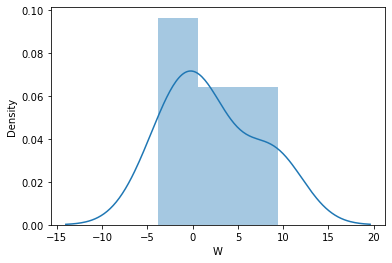

In [118]:
sns.distplot(LR_grid_Pred-y_test)

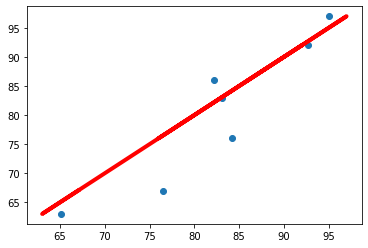

In [120]:
plt.scatter(LR_grid_Pred,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

In [121]:
print('MSE:',mean_squared_error(LR_grid_Pred,y_test))
print('MAE:',mean_absolute_error(LR_grid_Pred,y_test))
print('r2_score:',r2_score(LR_grid_Pred,y_test))

MSE: 25.827657996602056
MAE: 3.7618490017363393
r2_score: 0.7007977209358376


# Saving the model

In [122]:
import joblib

In [123]:
joblib.dump(LR_grid.best_estimator_,'Baseball Case Study Project.obj')

['Baseball Case Study Project.obj']

In [124]:
model=joblib.load('Baseball Case Study Project.obj')

In [125]:
model.predict(x_test)

array([76.45621352, 65.09807686, 95.08772745, 84.24426739, 83.10533837,
       92.65600567, 82.13923134])

In [126]:
print('MSE:',mean_squared_error(LR_grid_Pred,y_test))
print('MAE:',mean_absolute_error(LR_grid_Pred,y_test))
print('r2_score:',r2_score(LR_grid_Pred,y_test))

MSE: 25.827657996602056
MAE: 3.7618490017363393
r2_score: 0.7007977209358376
